# Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('superconduct/train.csv')   # Read the CSV file into a Pandas Dataframe
data.head()   # Peak into the first 5 rows of the dataset

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [6]:
data.shape    # Shape (rows, columns) of the dataset

(21263, 82)

In [7]:
data.info()   # Information about the columns of the dataset - name, datatype, count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [63]:
# Does this dataset have any missing values?

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [5]:
# Does this dataset have any duplicate rows?

if(data.duplicated().values.any() == True):
  ndup = data[data.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = data.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset now")

else:
  print("This dataset has no duplicated rows. No action required")



This dataset has 66 duplicated rows

The duplicate rows have been dropped from the dataset now


In [10]:
# Dataset shape after handling missing values and duplicates
data.shape

(21197, 82)

In [11]:
data.describe()     # Gives a descriptive statistical summary of the data columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,...,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000
mean,4.120300,87.544201,72.945331,71.253164,58.474874,1.166782,1.065103,115.751945,33.204053,44.436401,...,3.148856,3.052542,3.051485,1.297020,1.053977,2.042553,1.480890,0.839692,0.674168,34.494532
std,1.438282,29.643136,33.460789,30.990774,36.615381,0.364712,0.401225,54.584784,26.966285,20.019732,...,1.189878,1.044637,1.173221,0.392834,0.380121,1.243242,0.977545,0.485002,0.456038,34.276465
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.522475,52.143839,58.041225,35.247208,0.972995,0.781227,78.899680,16.799962,32.890369,...,2.116279,2.267933,2.090896,1.060857,0.778998,1.000000,0.921250,0.451754,0.306892,5.380000
50%,4.000000,84.922750,60.689236,66.361592,39.873869,1.199541,1.148465,122.906070,26.601500,45.123500,...,2.605455,2.615321,2.428047,1.368922,1.169665,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.374260,85.982703,78.019689,73.056021,1.444537,1.360388,154.119320,38.336200,59.356406,...,4.007317,3.662842,3.909523,1.589027,1.331531,3.000000,1.910400,1.200000,1.021023,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


# Dataset Preparation

Preparing various input datasets for experiments:

1) Direct dataset: X
2) Standardised dataset: X_std
3) PCA Reduced dataset: X_pca

In [6]:
### 1) Direct Dataset

X = data.drop('critical_temp', axis=1)
y = data['critical_temp']

# Import Scikit Learn's train_test_split to split data into 80% training and 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of samples and attributes of X: {X.shape}\n")
X.head()

Number of samples and attributes of X: (21197, 81)



,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


In [7]:
### Standardized Dataset

# Standardizing data centers the data around 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

X_train_std, X_test_std = train_test_split(X_std, test_size=0.2, random_state=42)

print(f"Number of samples and attributes of X after standardization: {X_std.shape}\n")
X_std.head()

Number of samples and attributes of X after standardization: (21197, 81)



,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-0.083643,0.047239,-0.450766,-0.157843,-0.610639,0.041164,-0.006747,0.131068,-0.052257,0.376259,...,-0.905294,-0.749433,-0.803339,-0.708921,0.183039,0.032211,-0.838596,-0.404263,-0.83853,-0.519945
1,0.611647,0.174919,-0.431169,0.060653,-0.602992,0.774676,-0.018313,0.131068,0.109691,0.132784,...,-1.144934,-0.749433,-1.114640,-0.716681,0.662110,-0.017774,-0.034228,-0.360420,-0.42730,-0.450766
2,-0.083643,0.047239,-0.450092,-0.157843,-0.610478,0.041164,-0.222130,0.131068,0.094084,0.376259,...,-0.905294,-0.737427,-0.803339,-0.697929,0.183039,-0.065251,-0.838596,-0.375034,-0.83853,-0.503197
3,-0.083643,0.047239,-0.450429,-0.157843,-0.610559,0.041164,-0.106705,0.131068,0.020914,0.376259,...,-0.905294,-0.743430,-0.803339,-0.703433,0.183039,-0.013531,-0.838596,-0.389649,-0.83853,-0.511408
4,-0.083643,0.047239,-0.451440,-0.157843,-0.610800,0.041164,0.159817,0.131068,-0.198597,0.376259,...,-0.905294,-0.761440,-0.803339,-0.719849,0.183039,0.110690,-0.838596,-0.433491,-0.83853,-0.538035


In [11]:
### PCA Reduced Dataset

# Use Principal Component Analysis to reduce dimensionality of data from 81 to 2

from sklearn.decomposition import PCA

pca_n = PCA(n_components=60)
X_pca = pd.DataFrame(pca_n.fit_transform(X_std))

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

print(f'Number of samples and attributes of X after PCA reduction: {X_pca.shape}')
X_pca.head()

Number of samples and attributes of X after PCA reduction: (21197, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-3.646900,0.999713,3.051826,1.697892,0.249161,-0.207807,0.447670,-0.217387,-0.388267,0.232478,...,0.067985,-0.060994,-0.002056,-0.032141,-0.010762,0.006846,0.155293,-0.050210,0.045485,-0.129471
1,-4.537828,-0.211469,1.729489,1.103595,0.983089,-1.008010,-0.262750,0.214778,0.394046,-1.123155,...,0.079789,-0.129964,-0.127516,0.085829,0.051914,-0.089554,0.177077,-0.137037,0.111304,-0.094909
2,-3.470397,1.063127,3.137686,1.795432,0.299784,-0.215808,0.481511,0.013319,-0.501371,0.194464,...,0.088975,-0.088953,-0.018526,-0.021735,-0.053588,0.023391,0.156166,-0.059764,0.028525,-0.134510
3,-3.563606,1.028157,3.091372,1.744885,0.273784,-0.212743,0.463094,-0.105912,-0.443554,0.212920,...,0.078368,-0.074496,-0.009267,-0.027179,-0.029423,0.014538,0.156637,-0.055061,0.038303,-0.132444
4,-3.792247,0.956488,2.987667,1.611754,0.202485,-0.193702,0.423214,-0.423932,-0.282920,0.273500,...,0.047351,-0.035903,0.008191,-0.040969,0.015164,-0.005839,0.148922,-0.040038,0.053840,-0.121572


# Dimensionality Reduction & Data Visualisation

In [9]:
# Use Principal Component Analysis (PCA) to reduce dimensions of data, while conserving information about the features
# Here, we reduce the dimensions of the input data from 81 to 2 so that it can be visualised in 3D

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
X_2D_pca = pca2.fit_transform(X_std)
print(f'PCA Features: Number of samples and attributes: {X_2D_pca.shape}')

PCA Features: Number of samples and attributes: (21197, 2)


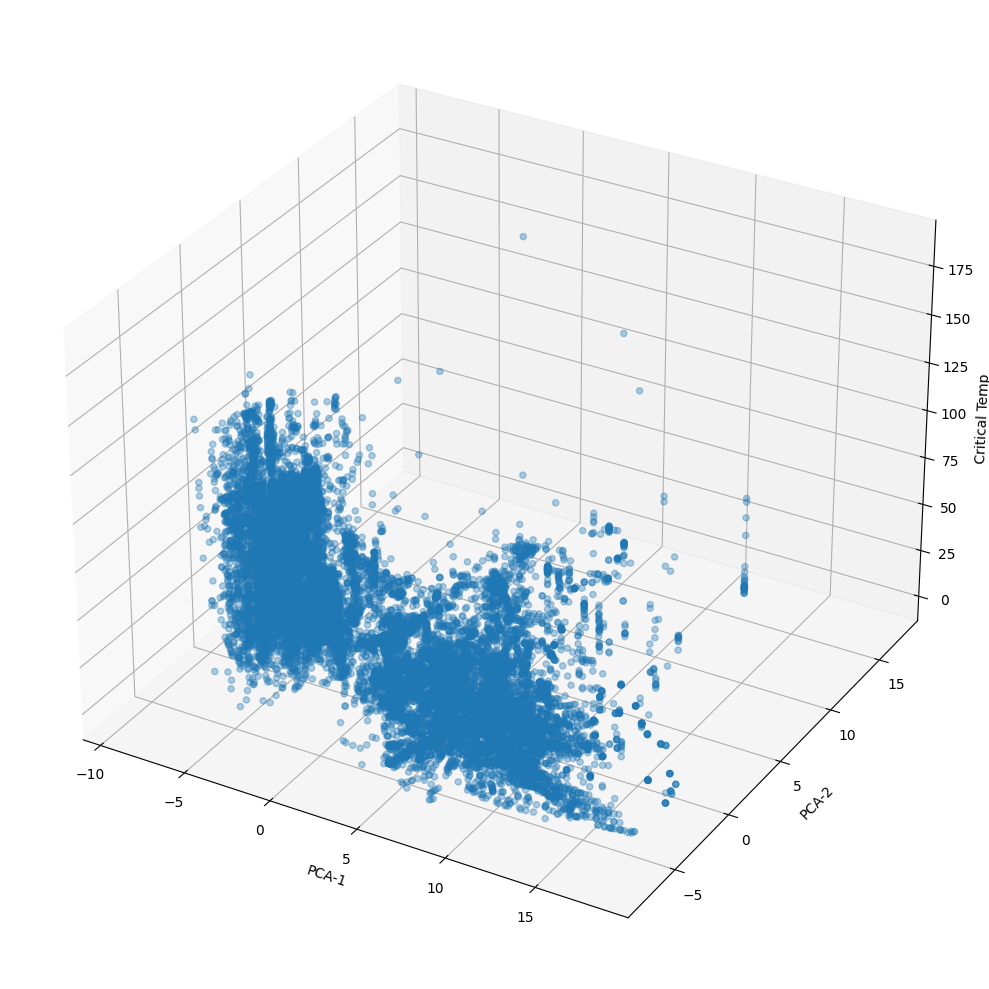

In [71]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_pca[:, 0], X_2D_pca[:, 1], y, alpha=0.35);
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Critical Temp")

plt.tight_layout()
plt.show()

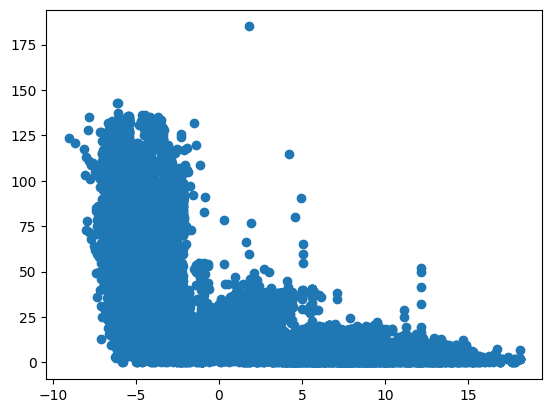

In [103]:
plt.scatter(X_2D_pca[:, 0], y)

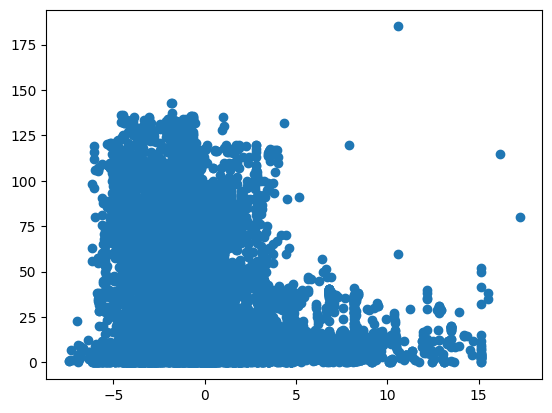

In [104]:
plt.scatter(X_2D_pca[:, 1], y)

## t-Distributed Stochastic Neighbour Embedding (t-SNE)

In [ ]:
'''
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')
X_2D_tsne = tsne2.fit_transform(X_std)
print(f'tSNE Embedding: Number of samples and attributes: {X_2D_tsne.shape}')
'''

In [14]:
'''
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_2D_tsne[:, 0], X_2D_tsne[:, 1], y, color="b");
ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")
ax.set_zlabel("Critical Temp")
plt.tight_layout()
plt.show()
'''

'\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure(figsize=(15, 10))\nax = fig.add_subplot(projection=\'3d\')\nax.scatter(X_2D_tsne[:, 0], X_2D_tsne[:, 1], y, color="b");\nax.set_xlabel("tSNE-1")\nax.set_ylabel("tSNE-2")\nax.set_zlabel("Critical Temp")\nplt.tight_layout()\nplt.show()\n'

# Feature Selection

Creating an alternate dataset with certain features selected based on their correlation values. The bottom 25 percentile of the features ranked by their correlation values are dropped.

(array([3., 1., 2., 0., 0., 4., 1., 7., 2., 4., 1., 1., 4., 0., 3., 3., 0.,
        1., 0., 0., 0., 4., 1., 0., 2., 1., 3., 2., 1., 4., 3., 1., 2., 1.,
        2., 6., 6., 2., 1., 2.]),
 array([-0.63192366, -0.59810156, -0.56427946, -0.53045736, -0.49663526,
        -0.46281316, -0.42899106, -0.39516896, -0.36134686, -0.32752476,
        -0.29370266, -0.25988057, -0.22605847, -0.19223637, -0.15841427,
        -0.12459217, -0.09077007, -0.05694797, -0.02312587,  0.01069623,
         0.04451833,  0.07834043,  0.11216253,  0.14598463,  0.17980672,
         0.21362882,  0.24745092,  0.28127302,  0.31509512,  0.34891722,
         0.38273932,  0.41656142,  0.45038352,  0.48420562,  0.51802772,
         0.55184982,  0.58567192,  0.61949401,  0.65331611,  0.68713821,
         0.72096031]),
 <BarContainer object of 40 artists>)

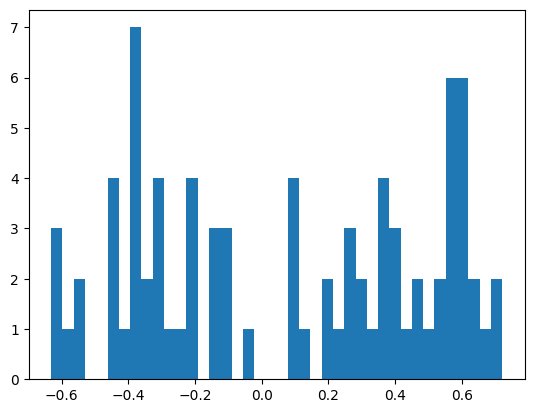

In [ ]:
# Histogram of correlation values of features with target variable critical_temp

correlation = data.corr()
correlation = correlation.drop('critical_temp', axis=0)
plt.hist(correlation['critical_temp'], bins=40)

In [ ]:
# Inspecting the correlation value for each feature

for k, v in correlation['critical_temp'].items():
    print(f"{k}, {v}")

number_of_elements, 0.600394055182847
mean_atomic_mass, -0.11317839649303417
wtd_mean_atomic_mass, -0.3119832502072971
gmean_atomic_mass, -0.22994106405006937
wtd_gmean_atomic_mass, -0.3694840714111939
entropy_atomic_mass, 0.5428941726044171
wtd_entropy_atomic_mass, 0.6265356613492065
range_atomic_mass, 0.4916424215328923
wtd_range_atomic_mass, -0.3372375169225366
std_atomic_mass, 0.378519448391443
wtd_std_atomic_mass, 0.35892821196282804
mean_fie, 0.10140062987501358
wtd_mean_fie, 0.3978883959339062
gmean_fie, -0.025680476288429257
wtd_gmean_fie, 0.3428140319387177
entropy_fie, 0.5671556479141354
wtd_entropy_fie, 0.3877026432771749
range_fie, 0.6001786440355417
wtd_range_fie, 0.29963177976562727
std_fie, 0.5410910690832423
wtd_std_fie, 0.5814422035843121
mean_atomic_radius, 0.10610167692790742
wtd_mean_atomic_radius, -0.29606092702537734
gmean_atomic_radius, -0.14266782717596035
wtd_gmean_atomic_radius, -0.4042285854629204
entropy_atomic_radius, 0.5582491219463678
wtd_entropy_atomic_r

In [ ]:
# Drop every row in corr_abs, where the value of that row is less than or equal to 0.260928 and get the names of the rows dropped

feature_names = []

corr_abs = correlation['critical_temp'].abs()
corr_abs = corr_abs[corr_abs < corr_abs.quantile(0.25)]

for k, v in corr_abs.items():
    feature_names.append(k)

data_fs = data.copy()

# Dropping columns that have a correlation value less than 0.26 (25% of the columns of the dataset)

for col_name in feature_names:
    data_fs = data_fs.drop(col_name, axis=1)

data_fs.info() # Inspecting the remaining columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_of_elements             21197 non-null  int64  
 1   wtd_mean_atomic_mass           21197 non-null  float64
 2   wtd_gmean_atomic_mass          21197 non-null  float64
 3   entropy_atomic_mass            21197 non-null  float64
 4   wtd_entropy_atomic_mass        21197 non-null  float64
 5   range_atomic_mass              21197 non-null  float64
 6   wtd_range_atomic_mass          21197 non-null  float64
 7   std_atomic_mass                21197 non-null  float64
 8   wtd_std_atomic_mass            21197 non-null  float64
 9   wtd_mean_fie                   21197 non-null  float64
 10  wtd_gmean_fie                  21197 non-null  float64
 11  entropy_fie                    21197 non-null  float64
 12  wtd_entropy_fie                21197 non-null 

In [ ]:
# Plotting Scatterplots of selected features against target variable along with correlation value

features=[]
for k, v in correlation['critical_temp'].items():
  if abs(v)>0.5:
    features.append(k)

for k, v in correlation['critical_temp'].items():
  if abs(v)>0.5:
    try:
        data.plot(kind='scatter', x=k, y='critical_temp', alpha=0.5)
        plt.title(f"Correlation: {v}")
        plt.figure(figsize=(10, 10))

    except ValueError:
        break;

In [ ]:
# 

# Baseline Model - Linear Regression

## Direct

In [13]:
# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Get the model's score on the testing data

print('\nR2 score on test data:\n', model.score(X_test, y_test))

# Get the model's intercept

print('\nIntercept: ', model.intercept_)

# Get the model's coefficients

print('\nCoefficients: ', model.coef_)


R2 score on test data:
 0.7353599049008341

Intercept:  -17.228530603010725

Coefficients:  [-3.09507908e+00  8.41641994e-01 -8.89921694e-01 -4.91659752e-01
  6.11205910e-01 -3.41077399e+01  4.81118660e+00  2.04170441e-01
  3.98143036e-02 -5.22476944e-01  6.68546173e-02  1.48566506e-01
 -2.19443136e-01 -1.47743693e-01  2.42218557e-01 -1.21350716e+02
  4.28194601e+01  6.58596203e-02  2.14650173e-02 -1.94739313e-01
 -8.07829424e-03 -4.07538012e-01  3.19648879e+00  3.94621389e-02
 -2.77676835e+00  7.86474325e+01  4.34005941e+01  2.07312535e-01
 -1.03318277e-01 -3.95836579e-01 -3.30474649e-01 -5.36959944e-03
  3.93268922e-04  1.73164140e-03  1.89532150e-03  1.73390340e+01
 -2.13767137e+01 -1.55583329e-03 -2.13889022e-04  6.52676013e-03
 -1.94049248e-03 -1.09176251e-01  5.39529409e-01  1.98464364e-01
 -6.08598995e-01  3.73650996e+00 -2.19865013e+01 -3.81534182e-01
 -1.34725488e-01  1.28813466e+00 -5.77008779e-01  1.63763505e+00
 -1.88256104e+00 -1.42743648e+00  1.52568229e+00 -1.99151928e+

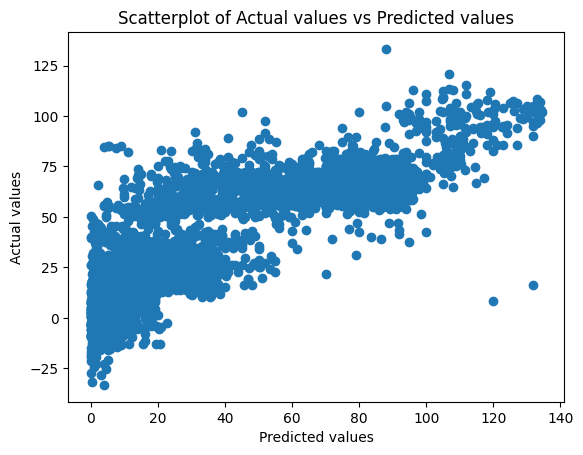

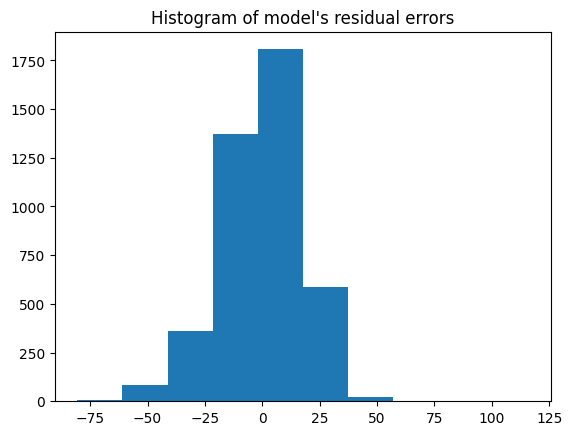

In [36]:
# Get the model's predictions on the test data

y_pred = model.predict(X_test)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test, y_pred)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Plot a histogram of the residuals

plt.hist(y_test - y_pred)
plt.title("Histogram of model's residual errors")
plt.show()

In [37]:
# Do a cross validation of the model using 10 folds and print it in terms of avg +/- std

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('\n', scores.mean(), '+/-', scores.std())


 0.7337205416664884 +/- 0.0181300752242031


## With Feature Selection

Using the `data_fs` dataset, which is a selection of only the top 75 percentile correlated features.

In [ ]:
## Using feature selected dataset

# Import Scikit Learn's train_test_split to split 'data' into 0.8 train and 0.2 test

from sklearn.linear_model import LinearRegression

X_fs = data_fs.drop('critical_temp', axis=1)
y_fs = data_fs['critical_temp']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Creating a linear regression model and fit it to the training data

from sklearn.model_selection import train_test_split

model_fs = LinearRegression()
model_fs.fit(X_train_fs, y_train_fs)

# Getting the model's score on the testing data

print('\nR2 score on test data (w/ feature selection): \n', model_fs.score(X_test_fs, y_test_fs))

# Getting the model's intercept

print('\nIntercept: ', model_fs.intercept_)

# Getting the model's coefficients

print('\nCoefficients: ', model_fs.coef_)


R2 score on test data (w/ feature selection): 
 0.7232760543024528

Intercept:  -18.34436924787414

Coefficients:  [-5.51102801e-01 -9.16046353e-02  1.69780981e-01 -3.09180432e+01
  2.09016469e+01  2.29636084e-01 -9.21691667e-02 -1.01032513e-01
 -2.72391766e-01  4.20280507e-02 -2.82597132e-02  5.32545115e+01
  4.13885830e+01  7.62106444e-02  6.61107508e-03 -1.21413499e-01
 -9.85695636e-02  2.14632013e+00 -2.04209721e+00 -1.56884993e+00
  2.98640073e+01  1.93757697e-01 -8.08994244e-04 -7.82843021e-01
  7.88987052e-02 -7.62902826e-04 -3.20503253e-03 -1.51611286e-03
  3.95105679e-03 -1.10971754e+01 -1.16580622e+01 -3.45833998e-04
  1.04840891e-03 -2.39816916e-02 -1.81683560e+01 -3.32892621e-01
  8.82225962e-01 -1.62767193e-01  3.73549524e-01 -1.19085397e+00
 -3.80025291e-01  9.45998100e-01  1.48560896e+00  2.43853476e+01
  5.26538144e-01 -1.18439888e-01  7.71239207e-01  1.97292797e-02
 -5.22922494e-01 -1.03396117e-01 -3.21969600e-01  3.70660088e-01
 -1.65284164e-01  9.67928230e+00 -2.391

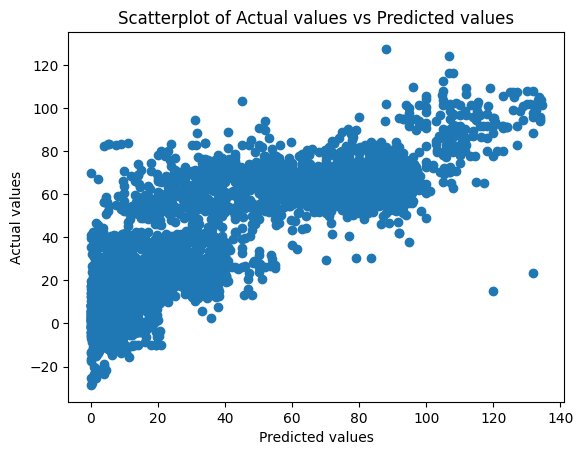

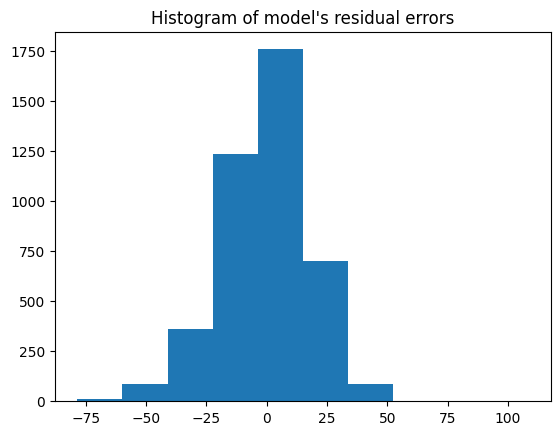

In [ ]:
# Get the model's predictions on the test data

y_pred_fs = model_fs.predict(X_test_fs)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test_fs, y_pred_fs)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Plot a histogram of the residuals

plt.hist(y_test_fs - y_pred_fs)
plt.title("Histogram of model's residual errors")
plt.show()

In [ ]:
# Doing a cross validation of the model using 10 folds and print it in terms of avg +/- std

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_fs, X_train_fs, y_train_fs, cv=10)
print('\n', scores.mean(), '+/-', scores.std())


 0.7165469130217834 +/- 0.019210403416915323


## With Feature Scaling

In [73]:
## Linear Regression with standard scaling

# Creating a linear regression model and fit it to the training data

model_std = LinearRegression()
model_std.fit(X_train_std, y_train)

# Getting the model's score on the testing data

print('\nR2 score on test data (w/ feature selection and standardization:\n', model_std.score(X_test_std, y_test))

# Getting the model's intercept

print('\nIntercepts', model_std.intercept_)

# Getting the model's coefficients

print('\nCoefficients: ', model_std.coef_)


R2 score on test data (w/ feature selection and standardization:
 0.735359904900787

Intercepts 34.556750592208964

Coefficients:  [ -4.4514926   24.94831965 -29.77677919 -15.23655665  22.37900924
 -12.43919791   1.93032398  11.14433652   1.07361855 -10.45960176
   1.33530746  12.99719911 -31.42548989 -11.57471665  28.99842553
 -46.30594065  14.30592459  20.36365045   4.80951154 -21.38586911
  -1.03247062  -8.21242103  91.98449384   0.87131084 -99.40910908
  29.50063471  17.65822902  13.93153475  -3.61538652  -9.05507882
  -8.35137941 -15.2571587    1.26510778   6.40177263   7.52438669
   5.93558652  -6.8362808   -6.36788375  -0.5130805   10.90881283
  -3.12337918  -3.02357167  17.41681628   5.75550975 -19.27188729
   1.28270953  -6.28843506 -22.38783528  -3.85290368  27.98800089
 -11.78067498  18.46795353 -26.80047762 -14.3450193   20.01135704
  -7.4833997    9.82936142  -6.88742111   7.02741239  -5.3215648
   5.28447383  -2.77965925  23.84486759  -2.21628822 -12.69664096
   3.895084

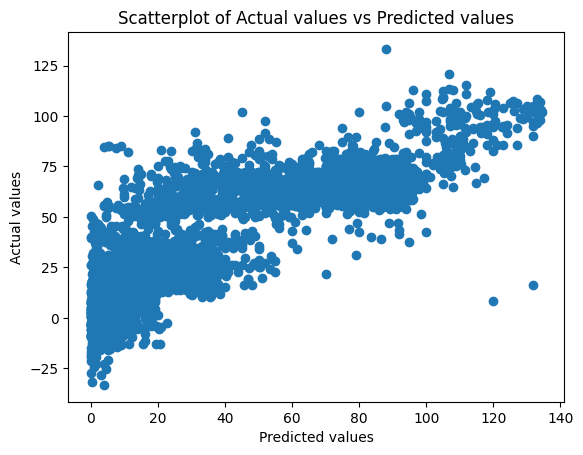

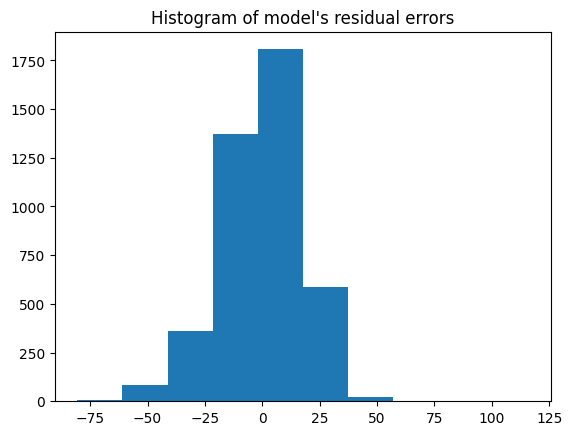

In [39]:
# Get the model's predictions on the test data

y_pred_std = model_std.predict(X_test_std)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test, y_pred_std)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Plot a histogram of the residuals

plt.hist(y_test - y_pred_std)
plt.title("Histogram of model's residual errors")
plt.show()

In [40]:
# Doing a cross validation of the model using 10 folds and print it in terms of avg +/- std

scores_std = cross_val_score(model_std, X_train_std, y_train, cv = 10)

print('\n', scores_std.mean(), '+/-', scores_std.std())


 0.733720541666476 +/- 0.0181300752241876


## With Dimensionality Reduction

In [14]:
## Linear Regression with standard scaling

# Creating a linear regression model and fit it to the training data

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Getting the model's score on the testing data

print('\nR2 score on test data (w/ dimensionality reduction:\n', model_pca.score(X_test_pca, y_test))

# Getting the model's intercept

print('\nIntercepts', model_pca.intercept_)

# Getting the model's coefficients

print('\nCoefficients: ', model_pca.coef_)


R2 score on test data (w/ dimensionality reduction:
 0.7212880715276667

Intercepts 34.53636444963642

Coefficients:  [-4.01231261e+00 -2.02262878e+00  2.36552976e+00 -1.30003116e+00
  2.50048983e+00  3.39297450e+00 -7.21042932e-01 -5.43008937e-01
 -1.81935587e+00  9.32324316e-02 -3.14525165e+00 -1.93223496e+00
  1.09360329e+00  1.73390117e-01  4.01122561e+00 -3.25599621e-01
 -3.90685958e-01 -4.61380584e+00  2.59273338e+00  8.31830582e+00
  3.17030680e+00  2.24505142e+00  1.34761862e+01 -1.54213550e+00
  1.15667207e+01  4.49087495e+00 -1.29197129e-02  1.55785983e+00
 -1.09116913e-01 -3.78170023e+00 -8.44232065e+00 -6.04158300e-01
 -2.90417557e+00 -3.36399453e+00  3.02445689e+00 -1.02766335e+01
 -2.41713732e+00  1.95242285e+00  6.04263559e-01  1.01313253e+00
 -1.32552282e+01  3.17891086e+00 -1.37469297e+01 -6.36694444e+00
 -1.51990131e+00  6.44065931e+00  1.17586667e+00 -7.12254630e+00
  3.59639819e+00  2.34076729e+00  2.33657928e+00  1.81686903e+00
  3.39383003e+00  2.63054095e+01 -1.

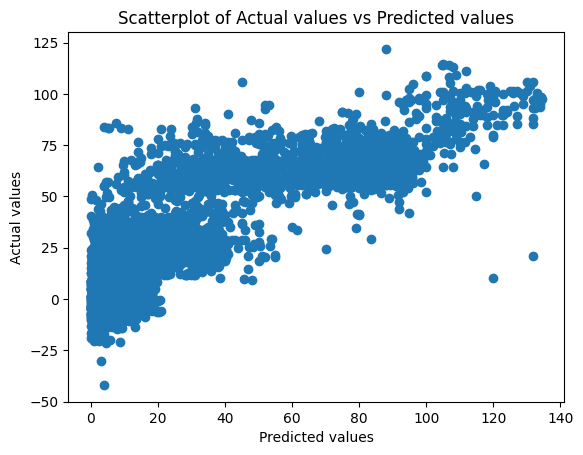

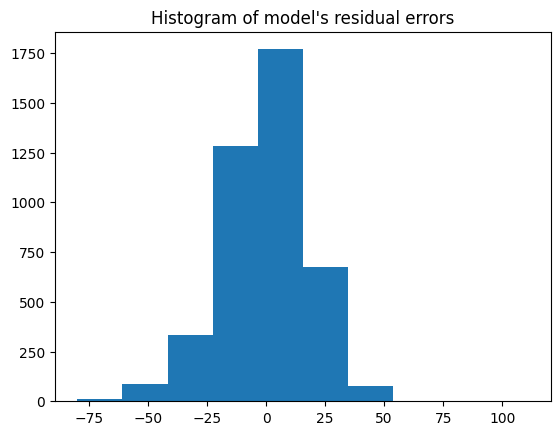

In [101]:
# Get the model's predictions on the test data

y_pred_pca = model_pca.predict(X_test_pca)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test, y_pred_pca)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Plot a histogram of the residuals

plt.hist(y_test - y_pred_pca)
plt.title("Histogram of model's residual errors")
plt.show()

In [102]:
# Doing a cross validation of the model using 10 folds and print it in terms of avg +/- std

scores_pca = cross_val_score(model_pca, X_train_pca, y_train, cv = 10)

print('\n', scores_pca.mean(), '+/-', scores_pca.std())


 0.7191892793950825 +/- 0.018811203543693172


# Regularisation

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# L1 regularization

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_std, y_train)
print('Lasso Score:', lasso_reg.score(X_test_std, y_test))

# L2 regularization

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train_std, y_train)
print('Ridge Score:', ridge_reg.score(X_test_std, y_test))

# L3 regularization

from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train_std, y_train)
print('ElasticNet score:', elastic_net_reg.score(X_test_std, y_test))

# 0.735359904900787

Lasso Score: 0.7106641465387586
Ridge Score: 0.7353392469917934
ElasticNet score: 0.6981885761596057


# Polynomial Regression

In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)


KeyboardInterrupt: 

In [1]:
# Get the polynomial model's score on the testing data
print('\nR2 score on test data:\n', poly_reg.score(X_test_poly, y_test_poly))

NameError: name 'poly_reg' is not defined

In [50]:
# Predict using polynomial features
y_pred_poly= poly_reg.predict(X_poly)

In [ ]:
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Samples for Polynomial Regression')
plt.plot(X, y_pred, 'm-', linewidth=2, label='Linear Regression')
plt.plot(X, y_pred_poly, 'r-', linewidth=2, label='Polynomial Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_std = poly_features.fit_transform(X_std)

X_train_poly_std, X_test_poly_std = train_test_split(X_poly_std, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

# SVM Regression

In [23]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(random_state=42)
svm_reg.fit(X_train,y_train)
print(svm_reg.intercept_)
print(svm_reg.coef_)
print(svm_reg.score(X_test, y_test))

[-0.00483951]
[-6.41008359e-02  8.83270948e-02 -5.27426118e-02  2.49114304e-02
  2.80679625e-02 -2.81346803e-02 -1.46572406e-02  2.73217204e-01
 -9.50690510e-02 -6.98107878e-02 -4.46872721e-01  5.12983702e-02
  1.33522613e-01 -6.35793377e-02 -1.16674892e-01 -2.44386472e-02
 -1.89034292e-02  7.98046782e-02  4.37048326e-02 -1.89947723e-01
 -8.42971720e-02  5.45872872e-02  3.79616591e-01 -3.05735883e-01
 -1.00583255e-01 -2.52467229e-02 -1.34146424e-02  1.13403223e-01
 -2.06168079e-01 -2.04300249e-01  1.33652002e-01 -4.87248379e-03
  6.83085925e-04 -3.55453223e-05  2.17681919e-03 -2.65881336e-02
 -2.10986561e-02  9.28108256e-04  8.27969619e-04  4.70808941e-03
 -4.77840315e-03  1.36628849e-01  2.71791319e-01 -7.34605258e-02
 -3.57498460e-01 -3.14401050e-02 -3.26734328e-02 -3.04738958e-01
 -1.89751078e-01  7.33679883e-01 -1.30407330e-01  1.57027589e-01
 -7.74827297e-02 -1.50907552e-01  1.21952286e-01 -1.02947087e-02
  1.49010932e-02 -7.92017062e-02  1.24362096e-01  8.48788164e-02
 -3.3892088

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear')
# svr_poly = SVR(kernel='poly', degree=2)
# svr_rbf = SVR(kernel='rbf')

y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
# y_poly = svr_poly.fit(X_train, y_train).predict(X_test)
# y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)

In [ ]:
plt.scatter(X, y, label='data points')
plt.plot(X, y_lin, color='g', label='Linear SVM')